In [7]:
import pandas as pd

df = pd.read_csv('./data/cabaventa.csv')
df = df[[x for x in df.columns if "Unnamed" not in x]] #saco una columnas que están mal. 

1) Son todas operaciones de venta (columna sin sentido)

In [4]:
df.operation_type.value_counts()

Venta    183810
Name: operation_type, dtype: int64

2) Las columnas **l1** y **l2** no tiene sentido mantenerlas

In [4]:
print("Países incluidos en la muestra: \n", df.l1.value_counts())
print()
print("Distritos incluidos en la muestra: \n", df.l2.value_counts())

Países incluidos en la muestra: 
 Argentina    183810
Name: l1, dtype: int64

Distritos incluidos en la muestra: 
 Capital Federal    183810
Name: l2, dtype: int64


3) Hay que pasar todo a dólares usando tipo de cambio de la fecha. 

In [5]:
df.currency.value_counts()

USD    179806
ARS       330
Name: currency, dtype: int64

4. La columna price_period tampoco tiene sentido???? (verrrrrr tema nulos)

In [9]:
df.price_period.value_counts()

Mensual    88720
Name: price_period, dtype: int64

5. La columna ad_type tampoco tiene sentido

In [11]:
df.ad_type.value_counts()

Propiedad    183810
Name: ad_type, dtype: int64

6. La columna operation_type tampoco

In [13]:
df.operation_type.value_counts()

Venta    183810
Name: operation_type, dtype: int64

7. Ver qué hacer con los casos cuyo valor en property_type == "Casa de campo"

Hay casos de viviendas que aparecen en capital pero corresponden a publicaciones fake o casos en los que es incorrecto el valor que tiene y hay que re-imputarlo. 

In [21]:
pd.set_option('display.max_colwidth', None)
for text in df[df.property_type=="Casa de campo"]['description']: 
    print(text,"\n","*"*25)

Venta de Quinta 2 DORMITORIOS, baño, living, cocina comedor, parrilla, sobre lote de 10 mts de frente por 35 mts de fondo, a una cuadra laguna en Barrio Parque Chascomús. 

 XINTEL(STA-STA-84) 
 *************************
Corredor Responsable: Luis Varela - CSI 5527 / CUCICBA 3872Contacto: Eduardo Wain - MLS ID # 361135-194En el corazón de Floresta a pasos de múltiples líneas de colectivos  y de la estación Floresta del Tren Sarmiento, nos encontramos con este confortable y luminoso departamento de 3 ambientes con balcón francés y lavadero independiente. En excelente estado de conservación y ubicado en el quinto piso, posee un Living comedor, cuenta con dos dormitorios con muy buena luz y placards. cocina con muebles alto y bajo mesada y lavadero independiente. Baño completo. Pisos en excelentes condiciones.Expensas Enero 2021$ 5.000.-Colectivos: 1, 2, 5, 8, 25, 36, 49, 55, 63, 85, 86, 88, 92, 96, 99, 104, 113, 114, 136, 163, 172Trenes:Floresta (SARMIENTO)Las medidas son estimativas, la

8. Log del Precio

Hay que ver los que no tienen precio y los que tienen precios cualca. Pero QUE LINDA que queda la variable cuando le hacés el logaritmo. 

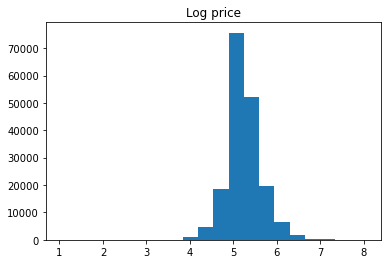

In [51]:
import matplotlib.pyplot as plt
import numpy as np
log_price = np.log10(df[df.price>10]['price']) 
plt.hist(log_price, bins=20)
plt.title("Log price")
plt.show()

9. Quizás title y description se pueden usar para completar los nulos de rooms, bedrooms, bathrooms, etc. 

In [52]:
df.title

0                                                               Exclente lote !! 
1         Excelente cochera fija y cubierta en edificio de cocheras !! impecable 
2                                           Oficina comercial · 265m² · 2 Cochera
3                                   Importante Oficina en Micro centro de 150 m2.
4                                                           Oficina - San Nicolas
                                           ...                                   
183805                         PH 6 Ambientes c/cochera y terraza en Monte Castro
183806                  Casa impecable en venta en la mejor zona de  - Belgrano R
183807                         Impactante vista a los parques. 420 m2 con cochera
183808                                                    Departamento - Belgrano
183809      Edificio Comercial  en excelente zona de Palermo - 615 Metros Totales
Name: title, Length: 183810, dtype: object

In [53]:
df.description

0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       

**NULOS**

In [11]:
100*df.isna().sum()/len(df)

id                   0.000000
ad_type              0.000000
start_date           0.000000
end_date             0.000000
created_on           0.000000
lat                  6.228170
lon                  6.228170
l1                   0.000000
l2                   0.000000
l3                   1.004842
l4                  96.048637
l5                 100.000000
l6                 100.000000
rooms               15.303846
bedrooms            27.188945
bathrooms           13.556390
surface_total       33.133127
surface_covered     34.017736
price                1.845384
currency             1.998803
price_period        51.732768
title                0.000000
description          0.000000
property_type        0.000000
operation_type       0.000000
dtype: float64

**BARRIOS**

In [15]:
df.l3.value_counts() #hay que completar nulos en esta columna. 

Palermo                 25169
Belgrano                21369
Caballito               11090
Recoleta                10382
Villa Urquiza            8373
Almagro                  8272
Villa Crespo             8211
Barrio Norte             5259
Flores                   5199
Nuñez                    5153
Balvanera                4805
Colegiales               3854
San Nicolás              3607
San Cristobal            3451
Villa Devoto             3228
Saavedra                 3121
Puerto Madero            3075
San Telmo                2766
Villa del Parque         2702
Floresta                 2462
Boedo                    2448
Monserrat                2378
Retiro                   2361
Mataderos                2273
Barracas                 2254
Liniers                  2078
Parque Chacabuco         1804
Villa Pueyrredón         1700
Coghlan                  1681
Villa Luro               1677
Congreso                 1385
Parque Patricios         1311
Chacarita                1308
Villa Luga

In [17]:
df.currency.value_counts()

USD    179806
ARS       330
Name: currency, dtype: int64

In [19]:
df.columns

Index(['id', 'ad_type', 'start_date', 'end_date', 'created_on', 'lat', 'lon',
       'l1', 'l2', 'l3', 'l4', 'l5', 'l6', 'rooms', 'bedrooms', 'bathrooms',
       'surface_total', 'surface_covered', 'price', 'currency', 'price_period',
       'title', 'description', 'property_type', 'operation_type'],
      dtype='object')

In [22]:
df.description

0         Lote 365 mts 8,90 x 43 mts C3 II.. FOT 3.6 PAR...
1         Muy buena cochera, en el 4to piso en excelente...
2         Gran Oportunidad! Unica piso de oficinas de 26...
3         Importante  Oficina de de 150 m2 con palier pr...
4         VENTA DE OFICINA A METROS DEL PALACIO DE TRIBU...
                                ...                        
183805    Corredor Responsable: Rene Vera - CUCICBA 6778...
183806    Casa en pleno Belgrano R reciclada con excelen...
183807    Piso de 419 m2 en un emblemático edificio mode...
183808    Piso de 285mts, en la mejor zona de Belgrano.<...
183809    Edificio Comercial CON ENTRADA INDEPENDIENTE S...
Name: description, Length: 183810, dtype: object